In [99]:
import matplotlib.pyplot as plt
import re
from operator import itemgetter 

In [100]:
# lr, hidden_dim, depth, params, dropout1, droput2, loss
data = None
with open("observations/analytics.txt", "r") as file:
    data = file.readlines()

In [101]:
for line in data:
    print(re.findall(r"[-+]?\d*\.\d+|\d+", line))

['32', '0.0003', '32', '1', '25450', '0.05', '0.27140732732312844']
['32', '0.0003', '32', '2', '26506', '0.05', '0.13429840263455345']
['32', '0.0003', '32', '3', '27562', '0.05', '0.17894927951352546']
['32', '0.0003', '32', '4', '28618', '0.05', '0.18381862216048872']
['32', '0.0003', '32', '5', '29674', '0.05', '0.18838115790472054']
['32', '0.0003', '64', '1', '50890', '0.05', '0.2678945535442795']
['32', '0.0003', '64', '1', '50890', '0.05', '0.2702018089217547']
['32', '0.0003', '64', '2', '55050', '0.05', '0.10623525462288874']
['32', '0.0003', '64', '3', '59210', '0.05', '0.11188878693704168']
['32', '0.0003', '64', '4', '63370', '0.05', '0.11053182030027471']
['32', '0.0003', '64', '5', '67530', '0.05', '0.1675955443427312']
['32', '0.0003', '128', '1', '101770', '0.05', '0.2704810263728872']
['32', '0.0003', '128', '2', '118282', '0.05', '0.08226244252814076']
['32', '0.0003', '128', '3', '134794', '0.05', '0.07975307808720418']
['32', '0.0003', '128', '4', '151306', '0.05',

In [102]:
run = list(map(list, [itemgetter(2, 3, 4, -1)(re.findall(r"[-+]?\d*\.\d+|\d+", line)) for line in data]))
for i in range(len(run)):
    for j in range(len(run[0])):
        if run[i][j].isdigit():
            run[i][j] = int(run[i][j])
        else:
            run[i][j] = float(run[i][j])

In [104]:
run

[[32, 1, 25450, 0.27140732732312844],
 [32, 2, 26506, 0.13429840263455345],
 [32, 3, 27562, 0.17894927951352546],
 [32, 4, 28618, 0.18381862216048872],
 [32, 5, 29674, 0.18838115790472054],
 [64, 1, 50890, 0.2678945535442795],
 [64, 1, 50890, 0.2702018089217547],
 [64, 2, 55050, 0.10623525462288874],
 [64, 3, 59210, 0.11188878693704168],
 [64, 4, 63370, 0.11053182030027471],
 [64, 5, 67530, 0.1675955443427312],
 [128, 1, 101770, 0.2704810263728872],
 [128, 2, 118282, 0.08226244252814076],
 [128, 3, 134794, 0.07975307808720418],
 [128, 4, 151306, 0.09141787733199144],
 [128, 5, 167818, 0.09000148213176153]]

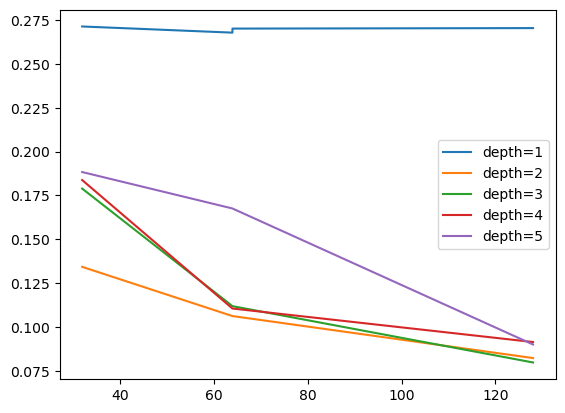

In [105]:
# See how loss changes with width for each depth
for i in range(1, 6):
    same_depth = list(filter(lambda x: x[1] == i, run))
    plt.plot([row[0] for row in same_depth], [row[-1] for row in same_depth], label=f"depth={i}")
plt.legend()
plt.show()

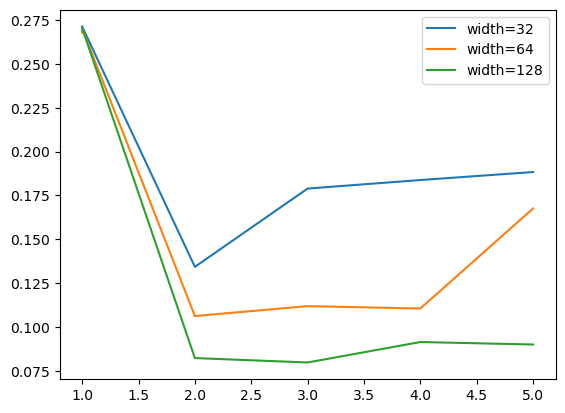

In [106]:
# See how loss changes with depth for each width
for i in [32, 64, 128]:
    same_width = list(filter(lambda x: x[0] == i, run))
    plt.plot([row[1] for row in same_width], [row[-1] for row in same_width], label=f"width={i}")
plt.legend()
plt.show()

In [107]:
# See how loss changes with the number of parameters
second_array = [sublist[2] for sublist in run]
third_array = [sublist[3] for sublist in run]
sorted_indexes = sorted(range(len(second_array)), key=lambda i: second_array[i])
second_array_sorted = [second_array[i] for i in sorted_indexes]
third_array_sorted = [third_array[i] for i in sorted_indexes]

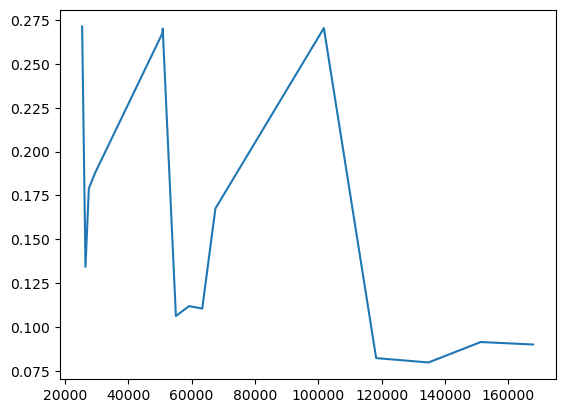

In [108]:
plt.plot(second_array_sorted, third_array_sorted)

In [109]:
import numpy as np
run = np.asarray(run)

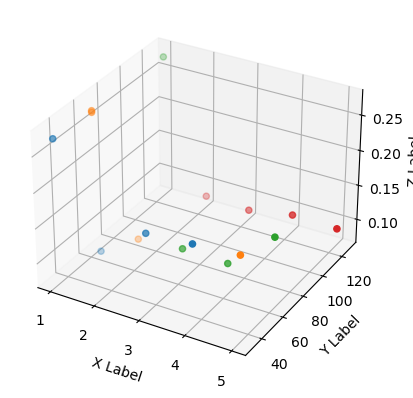

In [113]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

run =  run.reshape(4, 4, 4)
for d in run:
    ax.scatter(d[:, 1], d[:, 0], d[:, 3])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()